In [83]:
import numpy as np
import pandas as pd

# Condução Iglu

In [96]:
k = 2.5 # W/m.K
L = 0.9 # m
dT = 34 # K
dt = 7200 # s
d = 5 # m
A = d**2 * 5

Q = k * A * dT * dt / L; Q
c = 9440e3 # J/Km
m = Q/c; print('Massa de madeira: m =', round(m), 'Kg')

Massa de madeira: m = 9 Kg


# Férro no Tanque de Nitrogênio

In [1]:
def circle_area (R=None, D=None):
    
    if D==None: D=R*2
    return np.pi*(D/2)**2

In [246]:
def lei_dos_gases(P=None, V=None, n=None, R=8.3144621, T=None):
    
    if T==None: T = P*V/(n*R); print('T =', T, 'K'); return T
    if n==None: n = P*V/(R*T); print('n =', n, 'mols'); return n
    if P==None: P = (n*R*T)/V; print('P =', P, 'Pa'); return P
    if V==None: V = (n*R*T)/P; print('V =', V, 'm3'); return V
    
def atm_to_Pa(P_atm):
    
    P_Pa = P_atm * 1.01325e5 ; return P_Pa
def Pa_to_atm(P_Pa):
    
    P_atm = P_Pa / 1.01325e5 ; return P_atm

def massa_molar(M, n=None, m=None):
    
    if m==None: m = n * M; return m
    if n==None: n = m / M; return n

In [316]:
Vi = 1.5e-3  # m3
Pi = atm_to_Pa(1)  # atm
Ti = -196+273 # K

m_Fe = 0.118  # Kg
T_Fe = 273+20  # K
c_Fe = 449  # J/Kg.K

Vl = 0.5e-3  # m3
p_l_N2 = 810  #Kg/m3
M_N2 = 24e-3  #Kg/mol
Cv_N2 = 20.8  # J/mol.K
c_N2 = 0.25 * 4.184 * 1000 # J/Kg.K 
Le_N2 = 199e3 # J/Kg

R = 8.3144621   # J/mol.K

In [314]:
c_N2, c_Fe

(1046.0, 449)

### Transferência de Massa

In [319]:
m_N2_l = Vl * p_l_N2; print('m_l =', m_N2_l, 'Kg')
n_N2 = lei_dos_gases(V=Vi, P=Pi, T=Ti)
m_N2_g = massa_molar(n=n_N2, M=M_N2); print('m_g =', round(m_N2_g,5), 'Kg')

m_l = 0.405 Kg
n = 0.23740124287338282 mols
m_g = 0.0057 Kg


In [320]:
Q_eb = Le_N2 * m_N2_l; print('Q_eb_N2 =', Q_eb, 'J')

Q_Fe_max = m_Fe * c_Fe * (Ti - T_Fe); print('Q_Fe_max =', Q_Fe_max, 'J')
dm = - Q_Fe_max/Le_N2; print('dm =', round(dm, 4), 'Kg')
dn = massa_molar(M=M_N2, m=dm); print('dn =', round(dn, 3), 'mols')

Q_eb_N2 = 80595.0 J
Q_Fe_max = -11444.112 J
dm = 0.0575 Kg
dn = 2.396 mols


In [321]:
n_N2_f = n_N2 + dn; print('n_g_f =', round(n_N2_f, 5), 'mols')   # 
m_f = m_N2_g + dm; print('m_g_f =', m_f, 'Kg')

Tf = Ti
print('Pi =', Pi, 'Pa'); Pf = lei_dos_gases(V=Vi, T=Ti, n=n_N2_f); print('P_f =', Pa_to_atm(Pf), 'atm')

n_g_f = 2.63357 mols
m_g_f = 0.06320573033147375 Kg
Pi = 101325.0 Pa
P = 1124032.4166521425 Pa
P_f = 11.093337445370269 atm


In [322]:
Pa_to_atm(Pi* n_N2_f / n_N2)

11.093337445370269

### Testando alternativas

In [350]:
from IPython.display import clear_output as clear

In [358]:
df = []
for n in np.linspace(n_N2, n_N2_f, 30):
    row = []
    for pi in [9.3, 12.3, 7.6, 14.9, 5.9]:
    
        row.append(lei_dos_gases(V=Vi, P=atm_to_Pa(pi), n=n))
        clear(wait=True)
    df.append(row)


T = 40.95250885833272 K


In [361]:
df = pd.DataFrame(df, columns=[letter for letter in 'ABCDE'], index = np.linspace(n_N2, n_N2_f, 30))

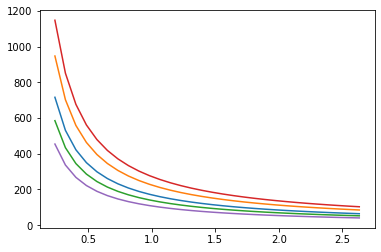

In [373]:
plt.plot(df)

### Sem transferência de Massa

In [347]:
print('c_N2 =', c_N2, 'J/Kg.K')
print('c_Fe =', c_Fe, 'J/Kg.K')
print()
print('m_N2 =', m_N2_l, 'Kg')
print('m_Fe =', m_Fe, 'Kg')

Tf = (m_Fe*c_Fe*T_Fe + m_N2_l*c_N2*Ti) / (m_Fe*c_Fe + m_N2_l*c_N2);
print()
print('T inicial N2: Ti_N2 =', Ti, 'K')
print('T inicial Fe: Ti_Fe =', T_Fe, 'K')
print('T final: Tf =', Tf, 'K')

c_N2 = 1046.0 J/Kg.K
c_Fe = 449 J/Kg.K

m_N2 = 0.405 Kg
m_Fe = 0.118 Kg

T inicial N2: Ti_N2 = 77 K
T inicial Fe: Ti_Fe = 293 K
T final: Tf = 101.0113803261353 K


In [348]:
Pf = lei_dos_gases(V=Vi, T=Tf, n=n_N2); print('P_f =', Pa_to_atm(Pf), 'atm')

P = 132921.79365643713 Pa
P_f = 1.3118361081316272 atm


In [266]:
Pf = Pi * Tf / Ti; Pf

132921.79365643713

In [269]:
Pf = lei_dos_gases(T=Tf, V=Vi, n=n_N2); print('P =', Pa_to_atm(Pf), 'atm')

P = 132921.79365643713 Pa
P = 1.3118361081316272 atm


# Dois Balões de Helio

In [34]:
def sphere_volume (R):
    V = (4/3) * np.pi * R **3; print('V =',V, 'm3')
    return V

In [46]:
def sphere_diam (V):
    D = 2 * (3 * V / (4*np.pi))**(1/3); print('Df:', D, 'm'); return D

In [84]:
gama = 1.67 # adim
Ti = 273 + 17  # K
Di = 0.2 # m
Pi = 2.6 * 101325 # Pa
Pf = 1.5 * 101325# Pa

n = lei_dos_gases(P=Pi, V=Vi, T=Ti)
Vi = sphere_volume(R=Di/2)

print('\nEsfera A')
Tf=Ti
Vf = lei_dos_gases(T=Tf, P=Pf, n=n)
dV = Vf-Vi; print('dV =', dV, 'm3')
Df = sphere_diam(Vf)
print('\nEsfera B')
Vf = Vi * (Pi/Pf)**(1/gama); print('Vf =', Vf, 'm3')
dV = Vf-Vi; print('dV =', dV, 'm3')
Df = sphere_diam(Vf)
Tf = lei_dos_gases(P=Pf, V=Vf, n=n)


n = 0.45766364356454864 mols
V = 0.004188790204786391 m3

Esfera A
V = 0.0072605696882964135 m3
dV = 0.003071779483510022 m3
Df: 0.24024665998860886 m

Esfera B
Vf = 0.005822798699281703 m3
dV = 0.001634008494495312 m3
Df: 0.22320866569589184 m
T = 232.5728827468774 K


# Diagrama PV 1

O diagrama de pV mostrado é para 7,50 mols de um gás diatômico ideal (ɣ = 7/5) levado através de um ciclo a-b-c. Qual é o calor trocado com o meio nas transformações ab, bc e ca? 

In [375]:
def variação_de_energia_térmica(n, T1, T2, Cv=None, Cp=None):
        
    if Cp==None: dE = n * Cv * (T2-T1)  # Pressão constante
    if Cv==None: dE = n * Cp * (T2-T1)  # Qualquer processo 
        
    print('Var. Eterm =', dE, 'J'); return dE

In [376]:
R = 8.3144621 # J/mol.K

n = 7.5 # mols
gama = 7/5
Cv = gama*R / (gama-1)  # J/mol.K
Cp = Cv/gama

print('gama =', gama,'\nCv =', Cv, '\nCp =', Cp)

Pa = 3e4; Va = 0.2
Pb = 5e4; Vb = 0.6
Pc = 3e4; Vc = 0.6
P = [Pa, Pb, Pc]; V = [Va, Vb, Vc]

gama = 1.4 
Cv = 29.100617350000004 
Cp = 20.786155250000004


In [380]:
7/2*R

29.10061735

In [377]:
Ti = [lei_dos_gases(V=vi, P=pi, n=n) for vi, pi in zip(V, P)]; 
Ta, Tb, Tc = Ti

dE_ab = variação_de_energia_térmica(n=n, T1=Ta, T2=Tb, Cv=Cv)
dE_bc = variação_de_energia_térmica(n=n, T1=Tb, T2=Tc, Cv=Cv)
dE_ca = variação_de_energia_térmica(n=n, T1=Tc, T2=Ta, Cv=Cv)
dE_i = [dE_ab, dE_bc, dE_ca]

Wab = (Vb-Va) * ( Pa + (Pb-Pa)/2 )
Wbc = 0
Wca = - Pa * (Vc-Va)
W_i = [Wab, Wbc, Wca]

Q_i = [(dE - W) for dE, W in zip( dE_i, W_i )]; 
Qab, Qbc, Qca = Q_i;

[print('W =', w, 'J') for w in W_i]
[print('Q =', q, 'J') for q in Q_i]

Res = pd.DataFrame({'T (K)':Ti, 'd_Eterm (J)':dE_i, 'W (J)':W_i, 'Q (J)':Q_i}, index=['A', 'B', 'C'])
Res.round(2)

T = 96.21789003043264 K
T = 481.0894501521632 K
T = 288.6536700912979 K
Var. Eterm = 84000.00000000001 J
Var. Eterm = -42000.00000000001 J
Var. Eterm = -42000.0 J
W = 15999.999999999998 J
W = 0 J
W = -11999.999999999998 J
Q = 68000.00000000001 J
Q = -42000.00000000001 J
Q = -30000.0 J


,T (K),d_Eterm (J),W (J),Q (J)
A,96.22,84000.0,16000.0,68000.0
B,481.09,-42000.0,0.0,-42000.0
C,288.65,-42000.0,-12000.0,-30000.0


In [383]:
Cv = 5/2*R
T1=Ta; T2=Tb
dT = (T2-T1); print('dT =', dT)
print('n =', n)
print('Cv =',Cv)
dE = n * Cv * dT; print('dE =', dE)

dT = 384.87156012173057
n = 7.5
Cv = 20.78615525
dE = 60000.00000000001


In [378]:
Tb-Ta

384.87156012173057

In [124]:
n * Cv * dT

84000.00000000001

In [ ]:
T

In [118]:
P[1]/Ti[1], P[2]/Ti[2]

V[2]/Ti[2], V[0]/Ti[0]

V[1]*P[1]/Ti[1], V[0]*P[0]/Ti[0]

# Diagrama PV 2

In [125]:
import matplotlib.pyplot as plt

In [310]:
gama = 1.67
gama2 = 1.4

(0.0, 50000.0)

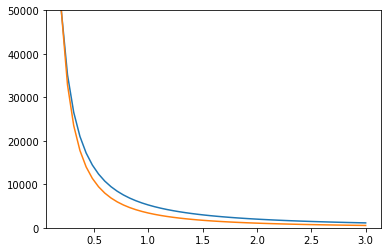

In [311]:
Pi = 5e4
Vi = 0.2
Vf = np.linspace(0.2, 3)

Pf = Vi / Vf * Pi

Pf_ad = Vi**gama / Vf**gama * Pi
Pf_ad2 = Vi**gama2 / Vf**gama2 * Pi

plt.plot(Vf, Pf_ad2); plt.plot(Vf, Pf_ad)
plt.ylim(0, 0.5e5)

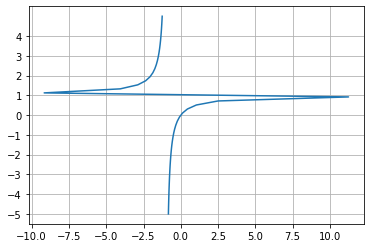

In [162]:
gama = np.linspace(-5, 5)
def g_gama(gama): g = gama/(1-gama); return g

g = g_gama(gama)
plt.plot(g, gama)
plt.grid()
plt.yticks(list(range(-5, 5, 1)))
#plt.xlim(-5, 5)
plt.show()

In [136]:
c1 = g_gama(1.67)
c2 = g_gama(1.4)

In [141]:
p = 2**c1/2**c2; p

2.0103722837433686

In [ ]:
Pi